# 小麦とチェス盤問題

## 1.このテキストについて

テキストの目的
数式演算ライブラリのNumPyに慣れる
グラフの表示に慣れる

どのように学ぶか
累乗に関する逸話の問題をNumPyを用いて解いていきます。

## 2.小麦とチェス盤問題

曽呂利新左衛門の米の逸話に似たものとして、小麦とチェス盤の話があります。これを題材に多次元配列を扱うための数値計算ライブラリ NumPy の使い方に慣れていきます。


If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?


Wheat and chessboard problem - Wikipedia（最終閲覧日：2019年5月31日）


8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題です。

## 3.少ないマスで考える

まずは4マスの板に小麦の粒を並べていくことを考えます。配列（リスト）の1つの要素を1つのマスに見立てています。


Pythonのリストとfor文を使い次のように作ることができます。

## 【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。


サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [1]:
import numpy as np

# 《サンプルコード》
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [2]:
matrix_board_ndarray = np.reshape(small_board_ndarray, (2, 2))
print("2×2マスのチェス盤に小麦を並べる(ndarray):\n{}".format(matrix_board_ndarray))

2×2マスのチェス盤に小麦を並べる(ndarray):
[[1 2]
 [4 8]]


# 【問題2】n×mマスへの拡張
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [3]:
board_list = [2 ** i for i in range(8 * 8)]
print(board_list)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824, 2147483648, 4294967296, 8589934592, 17179869184, 34359738368, 68719476736, 137438953472, 274877906944, 549755813888, 1099511627776, 2199023255552, 4398046511104, 8796093022208, 17592186044416, 35184372088832, 70368744177664, 140737488355328, 281474976710656, 562949953421312, 1125899906842624, 2251799813685248, 4503599627370496, 9007199254740992, 18014398509481984, 36028797018963968, 72057594037927936, 144115188075855872, 288230376151711744, 576460752303423488, 1152921504606846976, 2305843009213693952, 4611686018427387904, 9223372036854775808]


In [4]:
def n_m_board(num1, num2):
    board_list = [2 ** i for i in range(num1 * num2)]
    board_ndarray = np.reshape(board_list, (num1, num2))
    return board_ndarray

matrix = [8, 8]
result = n_m_board(matrix[0], matrix[1])
print("{}×{}マスのチェス盤に小麦を並べる（ndarray):\n{}".format(matrix[0], matrix[1], result))

8×8マスのチェス盤に小麦を並べる（ndarray):
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.6

# To:メンターへ

↑上のセル、表示を整数と指数表示でうまく組み合わせる方法があればご教示いただけると幸いです。
 .formatで{:e}や{:5g}など調べながらやってみましたがうまく行きませんでした。
 

## 【問題3】小麦の数の合計

8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。


棒グラフはサンプルコードを用意しています。

In [5]:
# 合計値
result_sum = np.sum(result)
print(result_sum)

# 各列の平均
result_column_mean = np.mean(result, axis=0)
print(result_column_mean)

1.8446744073709552e+19
[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


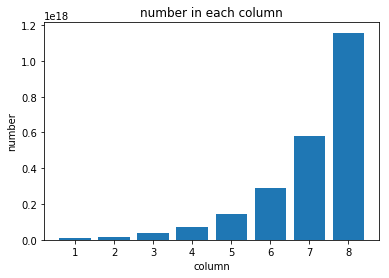

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,len(result_column_mean) + 1), result_column_mean)
plt.show()

## 【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。


ヒートマップはサンプルコードを用意しています。


《ヒートマップのサンプルコード》


4行2列の配列のヒートマップです。値が小さいところが紫、大きいところが黄色になっています。



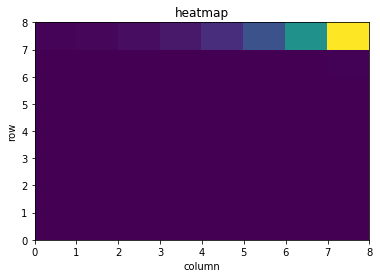

In [7]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(result)
#plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(matrix[0], matrix[1] ))
plt.show()

## 5.チェス盤の後半

アメリカの発明家レイ・カーツワイルはこの逸話を引用し、「チェス盤の後半」というフレーズを作りました。技術の進歩ははじめの内は社会に対して目立った影響が感じられなくとも、倍に倍にと進んでいくと、チェス盤の後半にさしかかったころから、急激な変化を起こすということを伝えています。



## 【問題5】後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [8]:
first_half_mean = np.mean(result[0:4])
# print(first_half_mean)
second_half_mean = np.mean(result[4:8])
# print(second_half_mean)

comparison = second_half_mean / first_half_mean
print("後半の４行の平均値は前半の４行の平均値の{}倍である。".format(int(comparison)))

後半の４行の平均値は前半の４行の平均値の4294967296倍である。


## 【問題6】他の計算方法によるn×mマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。


それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

In [6]:
# np.append版
def np_append_ver(num1, num2):
    n_squares = num1 * num2
    small_board_ndarray = np.array([1]).astype(np.uint64)
    for _ in range(n_squares - 1):
        small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
    
    small_board_reshape = np.reshape(small_board_ndarray, (int(num1), int(num2)))
    return small_board_reshape

grid_append1, grid_append2 = 8, 6
result_np_append_ver = np_append_ver(grid_1, grid_2)

#print("{}×{}マスの板に小麦を並べる（ndarray）:\n{}".format(grid_number, grid_number, result_np_append_ver))
print("{}×{}マスの板に小麦を並べた時の合計数は{}:\n".format(grid_append1, grid_append2, result_np_append_ver.sum()))

# ブロードキャスト版
def broadcast_ver(num1, num2):
    n_squares = num1 * num2
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    small_board_ndarray = 2**indices_of_squares
    
    small_board_reshape = np.reshape(small_board_ndarray, (int(num1), int(num1)))
    return small_board_reshape

grid_broadcast1, grid_broadcast2 = 8, 8
result_broadcast_ver = broadcast_ver(grid_broadcast1, grid_broadcast2)
# print("{}×{}マスの板に小麦を並べる（ndarray）:\n{}".format(grid_number, grid_number, result_broadcast_ver))
print("{}×{}マスの板に小麦を並べた時の合計数は{}:\n".format(grid_broadcast1, grid_broadcast2, result_broadcast_ver.sum()))

8×6マスの板に小麦を並べた時の合計数は281474976710655.0:

8×8マスの板に小麦を並べた時の合計数は18446744073709551615:



## 【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。


%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

In [10]:
%%timeit
time1 = n_m_board(matrix[0], matrix[1])

26.8 µs ± 240 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%%timeit
time2 = np_append_ver(grid_number **2)

229 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%%timeit
time3 = broadcast_ver(grid_number ** 2)

4.28 µs ± 67.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 考察
（速）①ブロードキャスト>②関数>③np.append（遅）の順となった。
ブロードキャストは関数内での計算やリスト追加などがないため速いのだと思われる。
関数内でfor文があると遅くなる。同じfor文でも内包表記の方が早い？のかもしれない。またappendの分、遅くなるということもあるのかも。


In [13]:
# 《サンプルコード》
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

# このリストにnp.array()を使うことで、ndarrayを作成することができます。
import numpy as np
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


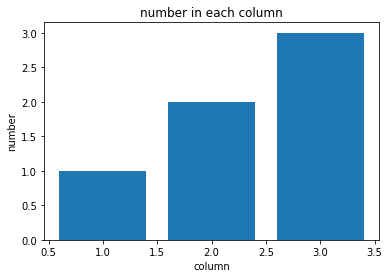

In [14]:
# 《棒グラフのサンプルコード》
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,4), np.array([1, 2, 3]))
plt.show()

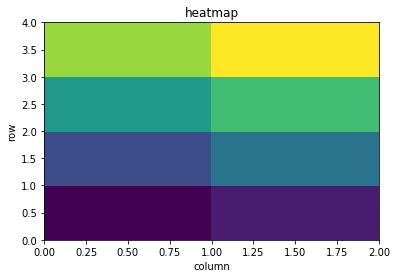

In [15]:
# ヒートマップサンプルグラフ
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(4, 2))
plt.show()